# Simple Exponential Smoothing and Holt models

In [94]:
import numpy as np
import pandas as pd
from statsmodels.tsa.api import SimpleExpSmoothing, Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error

In [4]:
df = pd.read_csv('GDP.csv', index_col='DATE', parse_dates=True)

In [5]:
df.head()

,GDP
DATE,
2010-01-01,14764.611
2010-04-01,14980.193
2010-07-01,15141.605
2010-10-01,15309.471
2011-01-01,15351.444


In [7]:
df.index.freq='QS'

<AxesSubplot:xlabel='DATE'>

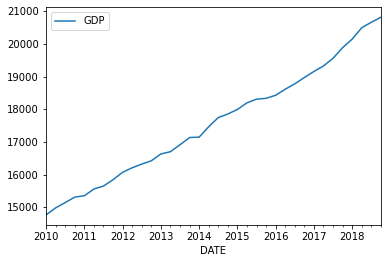

In [8]:
df.plot()

In [9]:
len(df)

36

In [11]:
ncut=int(0.8*len(df))
ncut

28

## split data into train and test

In [12]:
train_data = df.iloc[:ncut]
test_data = df.iloc[ncut:]

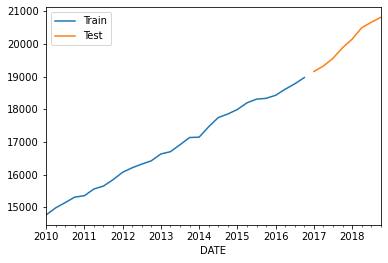

In [20]:
ax = train_data.plot()
test_data.plot(ax=ax)
ax.legend(['Train', 'Test'])

# Simple Exponential Smoothing

In [15]:
fitSES = SimpleExpSmoothing(train_data).fit()
fcastSES = fitSES.forecast(len(test_data)).rename('SES predict')

# Holt

In [18]:
fitHolt = Holt(train_data, exponential=False).fit()
fcastHolt = fitHolt.forecast(len(test_data)).rename('Holt predict')

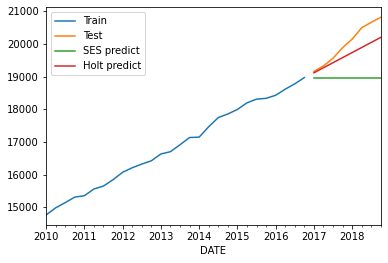

In [25]:
ax = train_data.plot()
test_data.plot(ax=ax)
fcastSES.plot(ax=ax)
fcastHolt.plot(ax=ax)
ax.legend(['Train', 'Test', 'SES predict', 'Holt predict'])

## Holt: parameters

In [23]:
fitHolt.params['smoothing_level']

0.7466448212000751

In [24]:
fitHolt.params['smoothing_trend']

0.03581189281626209

In [26]:
fitHolt.params['damping_trend']

nan

In [30]:
v = mean_absolute_percentage_error(test_data, fcastSES)*100
print(v, "%")

5.094419225398948 %


In [31]:
v = mean_absolute_percentage_error(test_data, fcastHolt)*100
print(v, "%")

1.7059047003425218 %


## Holt: changing parameters

## exponential = True

In [33]:
fitHolt = Holt(train_data, exponential=True).fit()
fcastHolt = fitHolt.forecast(len(test_data)).rename('Holt predict')

In [34]:
fitHolt.params['smoothing_level']

0.791881794315261

In [35]:
fitHolt.params['smoothing_trend']

3.28571787801376e-12

In [36]:
fitHolt.params['damping_trend']

nan

In [37]:
v = mean_absolute_percentage_error(test_data, fcastHolt)*100
print(v, "%")

1.181750835685166 %


## damped = True

In [38]:
fitHolt = Holt(train_data, damped_trend=True).fit()
fcastHolt = fitHolt.forecast(len(test_data)).rename('Holt predict')

In [39]:
fitHolt.params['smoothing_level']

0.8202235901540345

In [40]:
fitHolt.params['smoothing_trend']

0.08083883122538203

In [41]:
fitHolt.params['damping_trend']

0.9825769663816876

In [42]:
v = mean_absolute_percentage_error(test_data, fcastHolt)*100
print(v, "%")

2.4441865375085223 %


## exponential = True, damped = True

In [43]:
fitHolt = Holt(train_data, damped_trend=True, exponential=True).fit()
fcastHolt = fitHolt.forecast(len(test_data)).rename('Holt predict')

In [44]:
fitHolt.params['smoothing_level']

0.7312094139822731

In [45]:
fitHolt.params['smoothing_trend']

0.11084449371814062

In [46]:
fitHolt.params['damping_trend']

0.9850121500808126

In [47]:
v = mean_absolute_percentage_error(test_data, fcastHolt)*100
print(v, "%")

1.9091533074252784 %


# Holt-Winter model

In [49]:
df = pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates=True)
df

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [51]:
df.index.freq = 'MS'

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [53]:
df.describe()

,Thousands of Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


<AxesSubplot:xlabel='Month'>

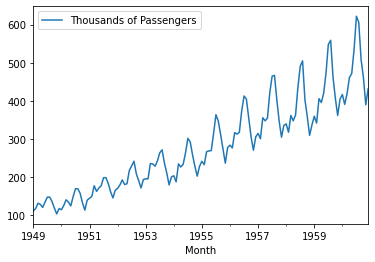

In [54]:
df.plot() # it is parent multiplicative trend ?

In [56]:
resultSeasonal = seasonal_decompose(x=df['Thousands of Passengers'], model='multiplicative')

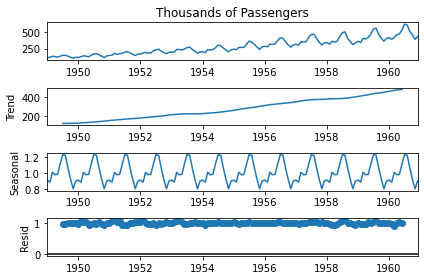

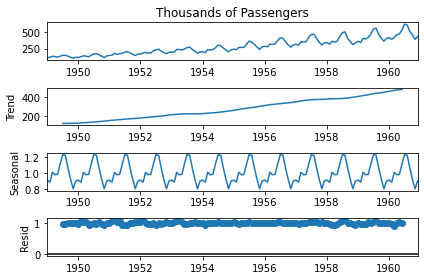

In [59]:
resultSeasonal.plot()

In [60]:
train_data = df.iloc[:109]
test_data = df.iloc[109:]

In [61]:
fitHoltWinter = ExponentialSmoothing(train_data['Thousands of Passengers'], trend='mul', seasonal='mul', seasonal_periods=12).fit()

/Users/michal/opt/anaconda3/envs/PySciEnv/lib/python3.8/site-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


In [62]:
fcastHoltWinter = fitHoltWinter.forecast(len(test_data)).rename("HW predict")

<AxesSubplot:xlabel='Month'>

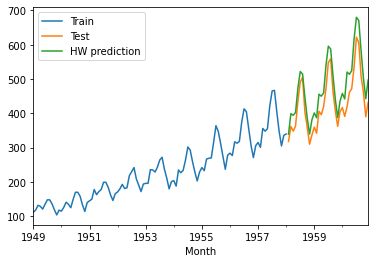

In [72]:
train_data['Thousands of Passengers'].plot(legend=True, label="Train")
test_data['Thousands of Passengers'].plot(legend=True, label="Test")
fcastHoltWinter.plot(legend=True, label="HW prediction")

<AxesSubplot:xlabel='Month'>

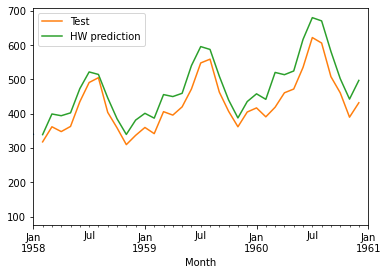

In [76]:
train_data['Thousands of Passengers'].plot()
test_data['Thousands of Passengers'].plot(legend=True, label="Test")
fcastHoltWinter.plot(legend=True, label="HW prediction", xlim=['1958-01-01', '1961-01-01'])

# Stationarity

In [79]:
df = pd.read_csv('samples.csv', index_col=0, parse_dates=True)

In [80]:
df

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62
...,...,...,...,...
1959-08-01,49,73,9338,58
1959-09-01,41,77,9502,38
1959-10-01,64,70,9667,42
1959-11-01,37,87,9833,62


In [81]:
df.index.freq='MS'

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 120 entries, 1950-01-01 to 1959-12-01
Freq: MS
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   a       120 non-null    int64
 1   b       120 non-null    int64
 2   c       120 non-null    int64
 3   d       120 non-null    int64
dtypes: int64(4)
memory usage: 4.7 KB


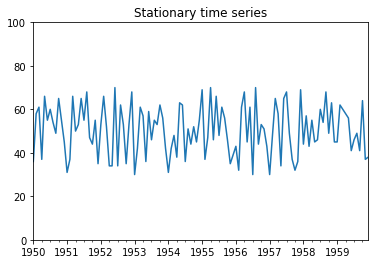

In [87]:
df['a'].plot(ylim=[0,100], title='Stationary time series').autoscale(axis='x', tight=True)

In [102]:
a = adfuller(df['a']) # if 2nd value (pi value) is less than 0.5 then data is stationary
b = adfuller(df['b']) 
c = adfuller(df['c'])
d = adfuller(df['d'])

print("\na", a)
print("\nb", b)
print("\nc", c)
print("\nd", d)


a (-11.98852210063378, 3.5660030396269613e-22, 0, 119, {'1%': -3.4865346059036564, '5%': -2.8861509858476264, '10%': -2.579896092790057}, 818.2653454599424)

b (-0.9579868976052264, 0.7682776824132866, 6, 113, {'1%': -3.489589552580676, '5%': -2.887477210140433, '10%': -2.580604145195395}, 704.0428206238495)

c (0.19889285709439689, 0.9721994292555223, 12, 107, {'1%': -3.492995948509562, '5%': -2.888954648057252, '10%': -2.58139291903223}, 496.1744493279364)

d (-12.064086854068545, 2.4313760931991416e-22, 0, 119, {'1%': -3.4865346059036564, '5%': -2.8861509858476264, '10%': -2.579896092790057}, 833.3277880574371)
